In [ ]:
#https://github.com/deepcharles/ruptures
#https://centre-borelli.github.io/ruptures-docs/code-reference/detection/kernelcpd-reference/#ruptures.detection.kernelcpd.KernelCPD

In [1]:
import import_ipynb
import matplotlib.pyplot as plt  # To visualize
import ruptures as rpt
from sklearn.linear_model import LinearRegression

from BabiloniaDataAnalytics import BabiloniaDataAnalytics
bda = BabiloniaDataAnalytics('../../server/app/config.json')
ONE_HOUR=120

importing Jupyter notebook from BabiloniaDataAnalytics.ipynb


In [2]:
bda.plot_node_moisture()
# Range: 1608951600 – 1609037999 => 26/12/2020 (entire day)

In [3]:
signal = bda.NODE_MOISTURE_DATA[(bda.NODE_MOISTURE_DATA.index > 1608951600) & (bda.NODE_MOISTURE_DATA.index < 1609037999)].rolling(60).mean().dropna() # 120 ~ 1 hour
signal.reset_index(level=0, inplace=True)

In [4]:
X = signal.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array

[MUX 0 ] >> SCORE: 0.6539601294392536  ALPHA: 0.0003130741706651955


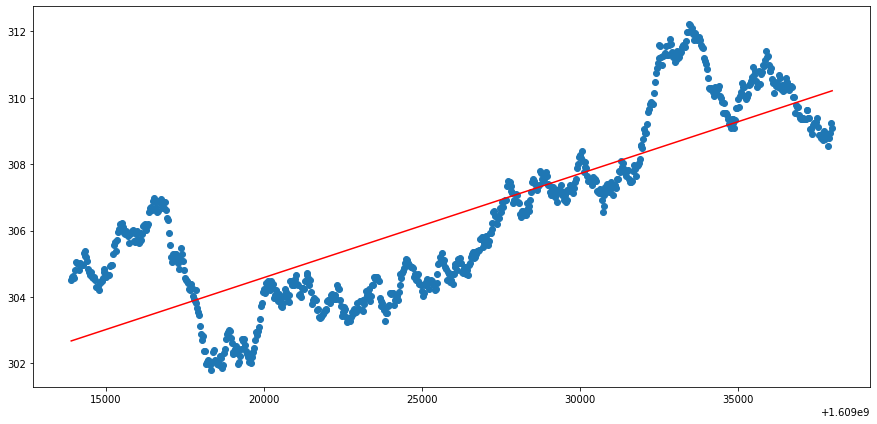

[MUX 1 ] >> SCORE: 0.7982778373852932  ALPHA: 0.0002947785103969087


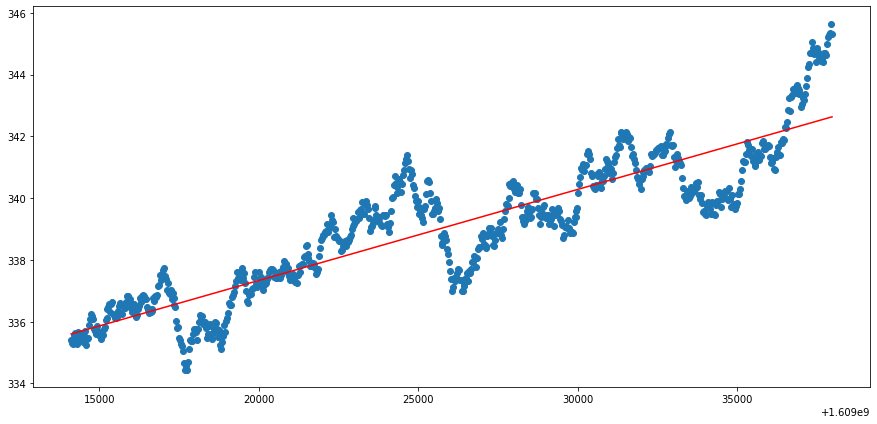

[MUX 2 ] >> SCORE: 0.581446800615802  ALPHA: 0.00027651839801205307


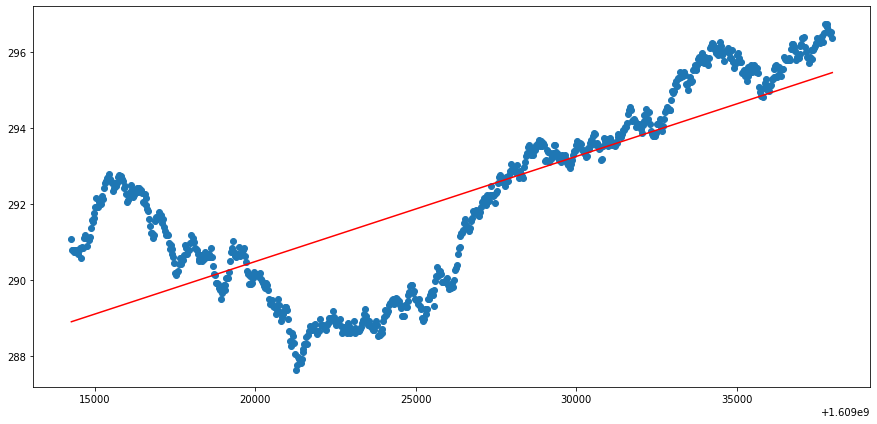

[MUX 3 ] >> SCORE: 0.3514180158487721  ALPHA: 0.00020716487114816434


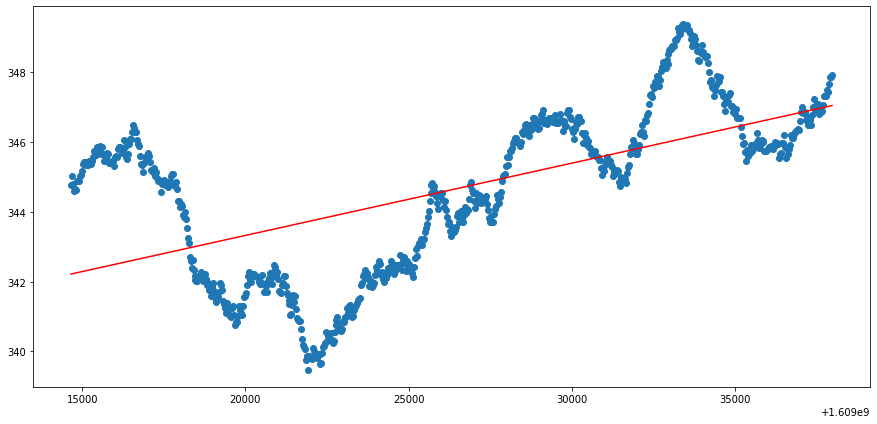

[MUX 4 ] >> SCORE: 0.6633523232693805  ALPHA: 0.00030919404383423837


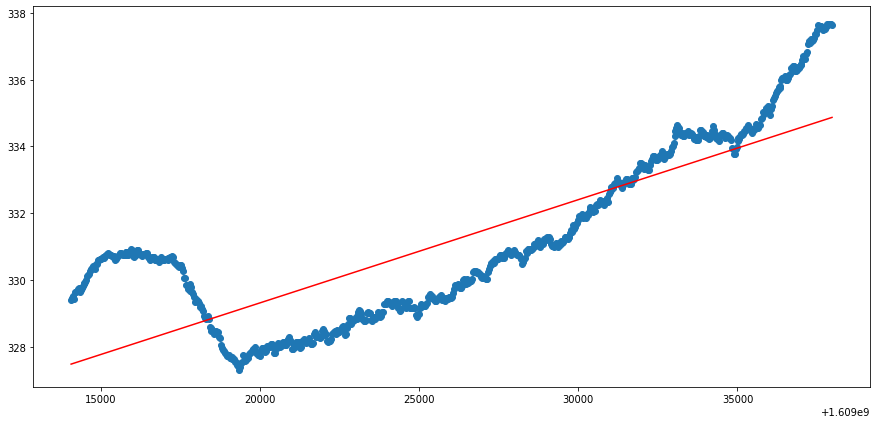

[MUX 5 ] >> SCORE: 0.9033970033484566  ALPHA: 0.0005333581283932991


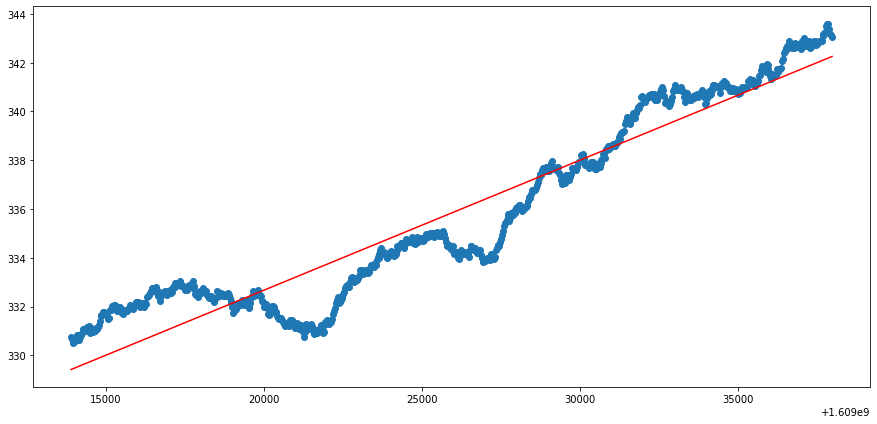

[MUX 6 ] >> SCORE: 0.6469134036501782  ALPHA: 0.0002984580629361751


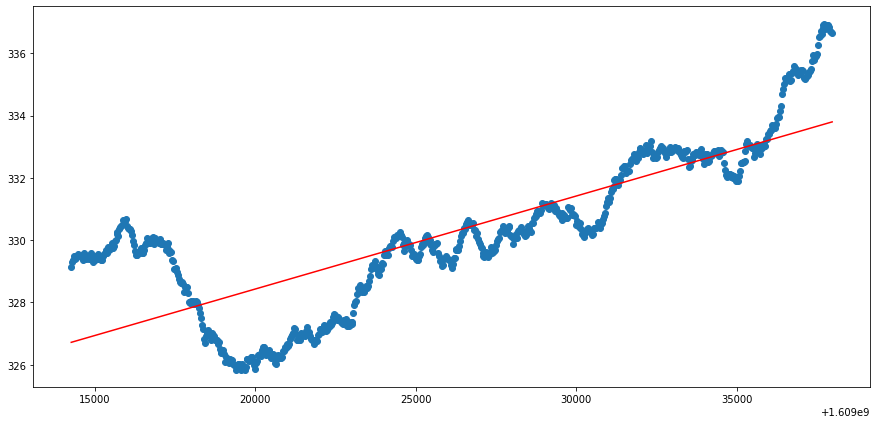

In [5]:
for i in range(1,8):
    Y = signal.iloc[:, i].values.reshape(-1, 1) 
    #https://centre-borelli.github.io/ruptures-docs/code-reference/detection/kernelcpd-reference/#ruptures.detection.kernelcpd.KernelCPD
    pelt = rpt.KernelCPD(kernel="linear", min_size=120).fit_predict(Y, n_bkps=1)  # written in C, same class as before
    # display
    X_filtered = X[pelt[0]+ONE_HOUR:]
    Y_filtered = Y[pelt[0]+ONE_HOUR:]
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X_filtered, Y_filtered)  # perform linear regression
    Y_pred = linear_regressor.predict(X_filtered)  # make predictions
    print("[MUX",i-1,"] >> SCORE:", linear_regressor.score(X_filtered,Y_filtered),
          " ALPHA:", linear_regressor.coef_[0][0])
    plt.scatter(X_filtered, Y_filtered)
    plt.plot(X_filtered, Y_pred, color='red')
    plt.show()